In [1]:
import pandas as pd # Excel+, tables and more
import numpy as np # Maths
import matplotlib.pyplot as plt # Setting up figures, axis labels, etc
import seaborn as sns # Scatterplots and stripplots and histograms, oh my
from scipy import stats # T tests, mann whitney u, ordinary least squares linear regression
import sys # for difficulties installing packages
!{sys.executable} -m pip install statsmodels
import statsmodels.api as sm # robust lineear regression
import statsmodels.formula.api as smf # mixed effect models
import sklearn # multilayer perceptrons, support vector machines, random forests

In [ ]:
people_data = pd.read_csv('../data/Participant Metadata.csv', parse_dates=True).set_index('Participant ID') # Reads in a csv from the data directory
display(people_data.head())
sample_data = pd.read_csv('../data/annotated_data.csv', parse_dates=True).set_index('Sample ID') # Uncomment this line and add the code to load the participant data
display(sample_data.head()) 
data = sample_data.join(people_data, on='Participant ID') # Adds the participant data to the sample data. Works as is, uncomment with Ctrl+/ to run
for col in data.columns: # Loops through the columns in the data
    if 'Date' in col: # Checks if 'Date' is in the column name
        data[col] = pd.to_datetime(data[col], errors='coerce') # Converts the column to datetime, coercing errors to NaT
display(data.head()) # Displays the first 5 rows of the participant data

,Name,Email,Sex,Race,Infection Pre-Vaccine,Age,Vaccine Type,Dose 1 Date,Dose 2 Date,Infection 1 Date,Infection 2 Date,Dose 3 Date,Baseline Date
Participant ID,,,,,,,,,,,,,
SPARTA-001,Hajra Odom,hajra.odom@gch.org,Female,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaN,2021-10-04,2020-12-21
SPARTA-002,Keelan Garrison,keelan.garrison@gch.org,Male,Asian,Yes,46,Pfizer,2021-02-04,2021-02-25,2020-05-04,2022-02-25,2021-12-20,2020-06-01
SPARTA-003,Harry Boyer,harry.boyer@gch.org,Male,White,Yes,43,Pfizer,2021-01-30,2021-02-19,2020-04-13,NaN,2021-10-15,2020-06-09
SPARTA-004,Meghan Roman,meghan.roman@gch.org,Female,White,No,47,Pfizer,2021-01-13,2021-02-03,2022-01-30,NaN,2021-09-21,2021-01-06
SPARTA-005,Jerry Sloan,jerry.sloan@gch.org,Female,White,No,36,Moderna,2021-01-11,2021-02-09,2022-01-06,NaN,2021-09-18,2020-06-12


,Participant ID,Date,AUC,Days from Baseline,Days from Dose 1,Days from Dose 2,Days from Dose 3,Days from Infection 1,Days from Infection 2,Days from Last Exposure,Last Exposure,Exposure Count
Sample ID,,,,,,,,,,,,
W3310,SPARTA-001,2020-12-21,5.000000,0,-25,-48,-287,-409.0,NaN,NaN,NaN,0
C6935,SPARTA-001,2021-03-15,778.513374,84,59,36,-203,-325.0,NaN,36.0,Dose 2,2
X2393,SPARTA-001,2021-05-11,262.368202,141,116,93,-146,-268.0,NaN,93.0,Dose 2,2
G4311,SPARTA-001,2021-06-07,177.732519,168,143,120,-119,-241.0,NaN,120.0,Dose 2,2
G9478,SPARTA-001,2021-07-30,183.948574,221,196,173,-66,-188.0,NaN,173.0,Dose 2,2


,Participant ID,Date,AUC,Days from Baseline,Days from Dose 1,Days from Dose 2,Days from Dose 3,Days from Infection 1,Days from Infection 2,Days from Last Exposure,...,Race,Infection Pre-Vaccine,Age,Vaccine Type,Dose 1 Date,Dose 2 Date,Infection 1 Date,Infection 2 Date,Dose 3 Date,Baseline Date
Sample ID,,,,,,,,,,,,,,,,,,,,,
W3310,SPARTA-001,2020-12-21,5.000000,0,-25,-48,-287,-409.0,NaN,NaN,...,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaT,2021-10-04,2020-12-21
C6935,SPARTA-001,2021-03-15,778.513374,84,59,36,-203,-325.0,NaN,36.0,...,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaT,2021-10-04,2020-12-21
X2393,SPARTA-001,2021-05-11,262.368202,141,116,93,-146,-268.0,NaN,93.0,...,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaT,2021-10-04,2020-12-21
G4311,SPARTA-001,2021-06-07,177.732519,168,143,120,-119,-241.0,NaN,120.0,...,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaT,2021-10-04,2020-12-21
G9478,SPARTA-001,2021-07-30,183.948574,221,196,173,-66,-188.0,NaN,173.0,...,Asian,No,42,Pfizer,2021-01-15,2021-02-07,2022-02-03,NaT,2021-10-04,2020-12-21


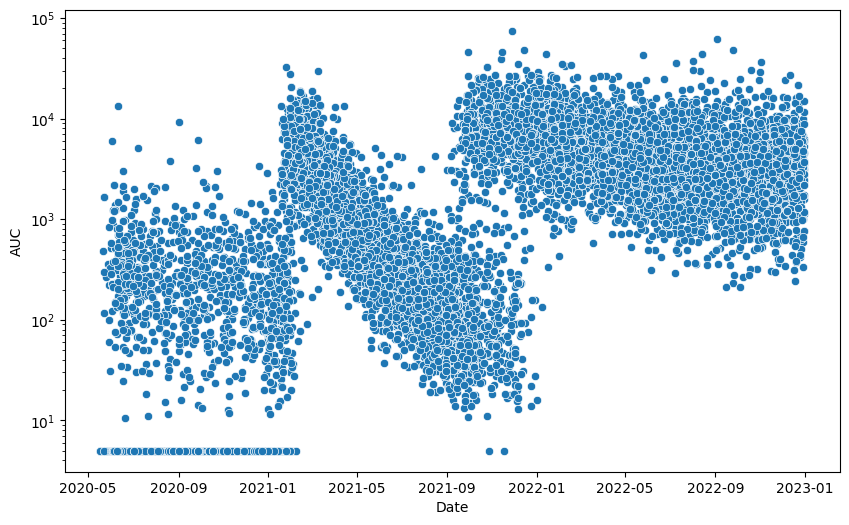

In [8]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
sns.scatterplot(data=data, x='Date', y='AUC')
plt.yscale('log')
plt.show()

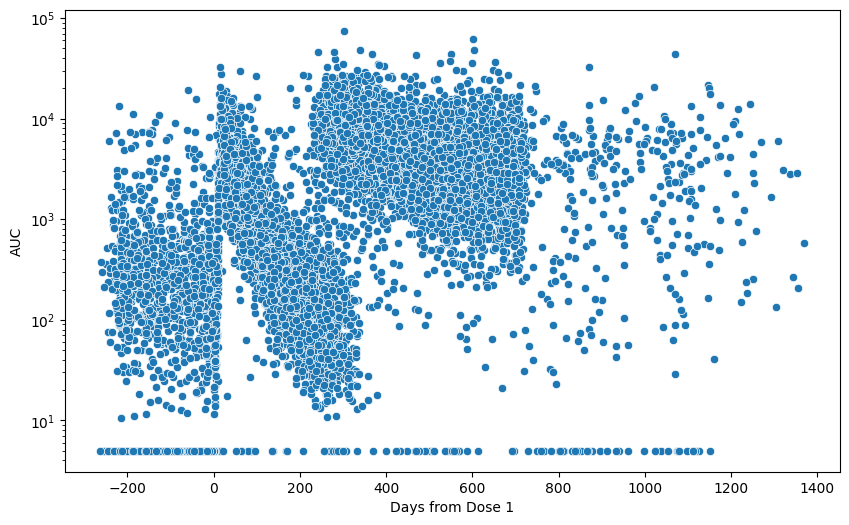

In [9]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
sns.scatterplot(data=data, x='Days from Dose 1', y='AUC')
plt.yscale('log')
plt.show()

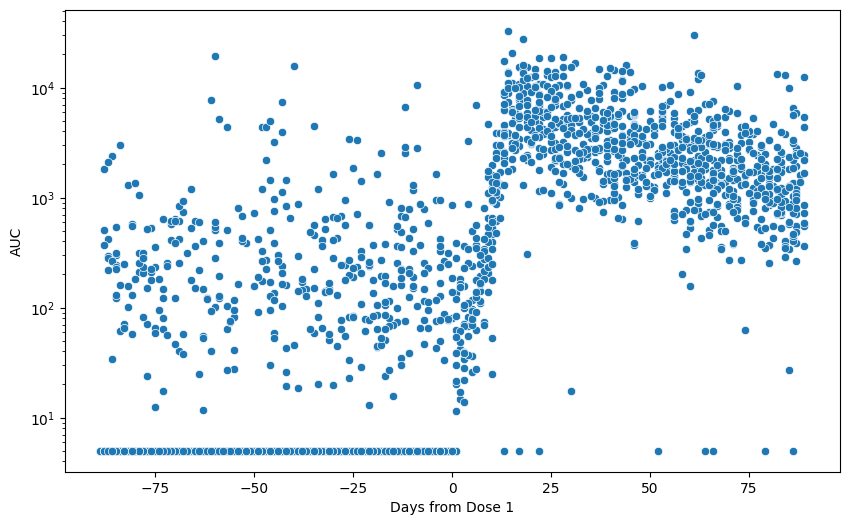

In [10]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
sns.scatterplot(data=near_vax, x='Days from Dose 1', y='AUC')
plt.yscale('log')
plt.show()

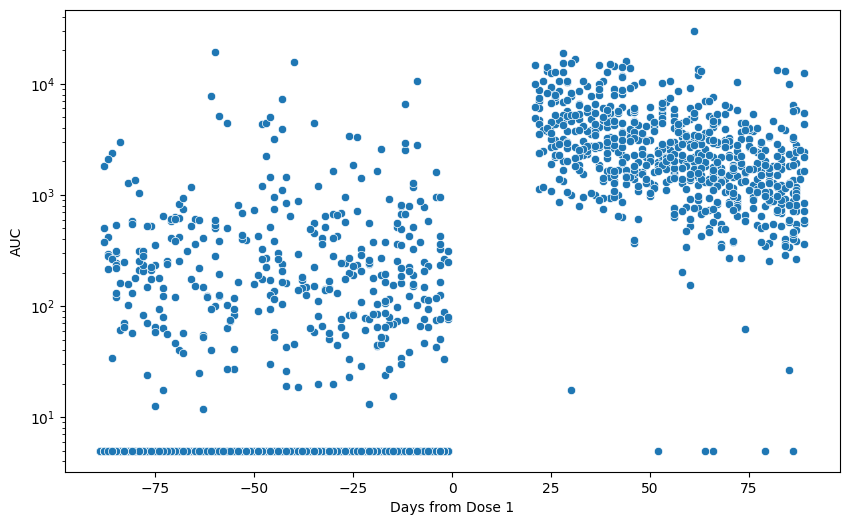

In [11]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
sns.scatterplot(data=not_between_doses, x='Days from Dose 1', y='AUC')
plt.yscale('log')
plt.show()

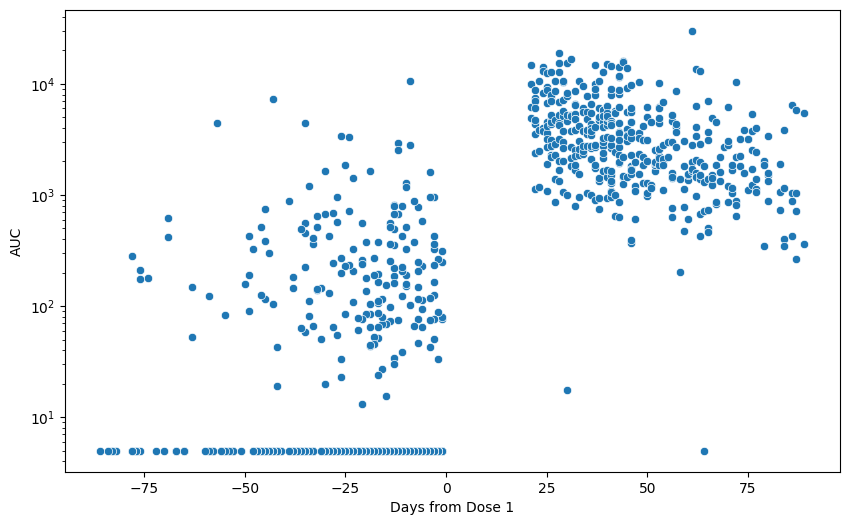

In [12]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
not_between_doses['After Vax'] = not_between_doses['Days from Dose 1'] > 0
pre_post = not_between_doses.sort_values(by='Days from Dose 1', key=lambda x: x.abs()).drop_duplicates(subset=['Participant ID', 'After Vax'])
sns.scatterplot(data=pre_post, x='Days from Dose 1', y='AUC')
plt.yscale('log')
plt.show()

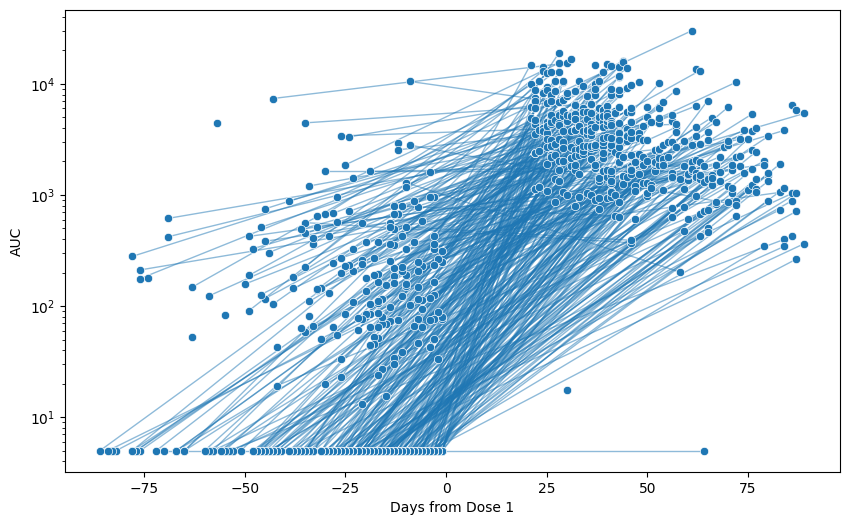

In [16]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
not_between_doses['After Vax'] = not_between_doses['Days from Dose 1'] > 0
pre_post = not_between_doses.sort_values(by='Days from Dose 1', key=lambda x: x.abs()).drop_duplicates(subset=['Participant ID', 'After Vax'])
sns.scatterplot(data=pre_post, x='Days from Dose 1', y='AUC')
sns.lineplot(data=pre_post, x='Days from Dose 1', y='AUC',
             size='Participant ID', sizes=(1,1), legend=False,
             alpha=0.5, zorder=-10, errorbar=None)
plt.yscale('log')
plt.show()

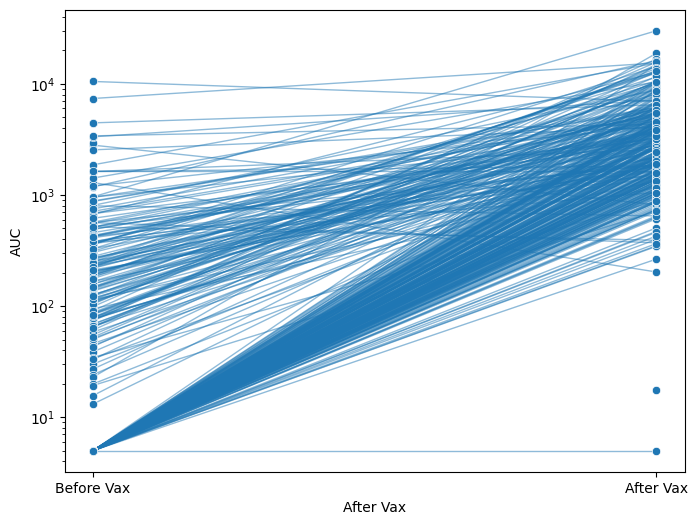

In [19]:
fig, ax = plt.subplots(figsize=(8, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
not_between_doses['After Vax'] = not_between_doses['Days from Dose 1'] > 0
pre_post = not_between_doses.sort_values(by='Days from Dose 1', key=lambda x: x.abs()).drop_duplicates(subset=['Participant ID', 'After Vax'])
sns.scatterplot(data=pre_post, x='After Vax', y='AUC')
sns.lineplot(data=pre_post, x='After Vax', y='AUC',
             size='Participant ID', sizes=(1,1), legend=False,
             alpha=0.5, zorder=-10, errorbar=None)
plt.yscale('log')
plt.xticks([0, 1], ['Before Vax', 'After Vax'])
plt.show()

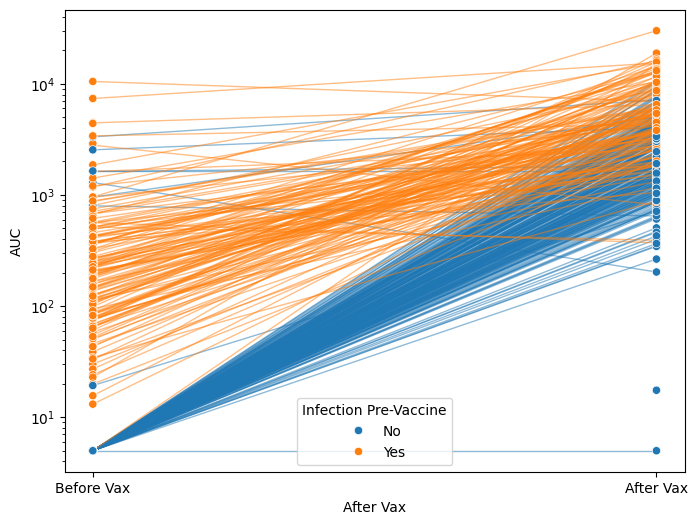

In [20]:
fig, ax = plt.subplots(figsize=(8, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
not_between_doses['After Vax'] = not_between_doses['Days from Dose 1'] > 0
pre_post = not_between_doses.sort_values(by='Days from Dose 1', key=lambda x: x.abs()).drop_duplicates(subset=['Participant ID', 'After Vax'])
sns.scatterplot(data=pre_post, x='After Vax', y='AUC', hue='Infection Pre-Vaccine')
sns.lineplot(data=pre_post, x='After Vax', y='AUC', hue='Infection Pre-Vaccine',
             size='Participant ID', sizes=(1,1), legend=False,
             alpha=0.5, zorder=-10, errorbar=None)
plt.yscale('log')
plt.xticks([0, 1], ['Before Vax', 'After Vax'])
plt.show()

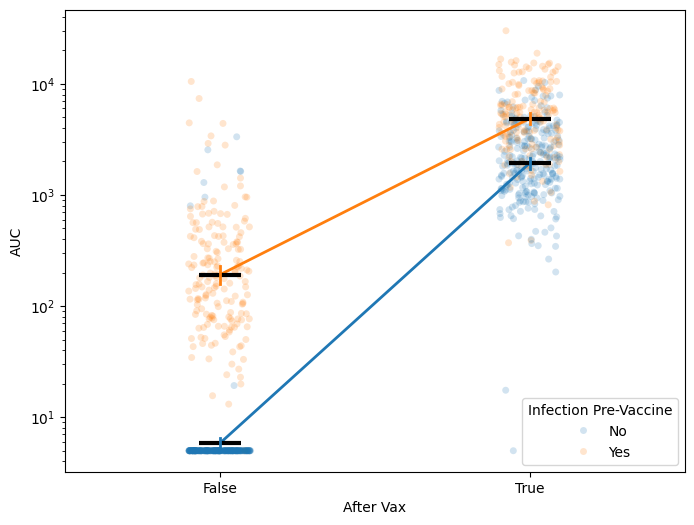

In [40]:
fig, ax = plt.subplots(figsize=(8, 6)) # Sets up a figure and axis for plotting
near_vax = data[data['Days from Dose 1'].abs() < 90].copy()
not_between_doses  = near_vax[(near_vax['Days from Dose 1'] < 0) | (near_vax['Days from Dose 2'] > 0)].copy()
not_between_doses['After Vax'] = not_between_doses['Days from Dose 1'] > 0
pre_post = not_between_doses.sort_values(by='Days from Dose 1', key=lambda x: x.abs()).drop_duplicates(subset=['Participant ID', 'After Vax'])
plt.yscale('log')
sns.stripplot(data=pre_post, x='After Vax', y='AUC', hue='Infection Pre-Vaccine', alpha=0.2)
sns.pointplot(data=pre_post, x='After Vax', y='AUC', hue='Infection Pre-Vaccine', zorder=10, marker='_', markersize=30, linewidth=2, legend=False,
              markeredgecolor='black', markeredgewidth=3)

# plt.xticks([0, 1], ['Before Vax', 'After Vax'])
plt.show()

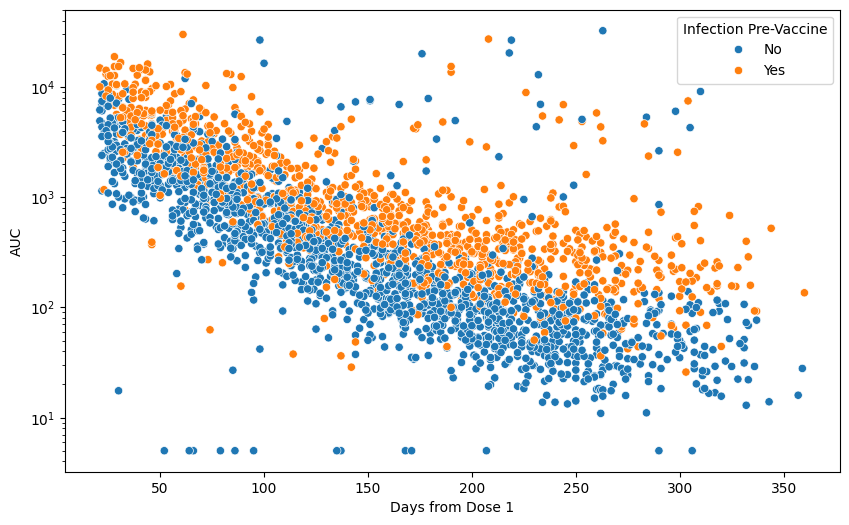

In [43]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
post_vax = data[data['Last Exposure'] == 'Dose 2'].copy()
sns.scatterplot(data=post_vax, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine')
plt.yscale('log')
plt.show()

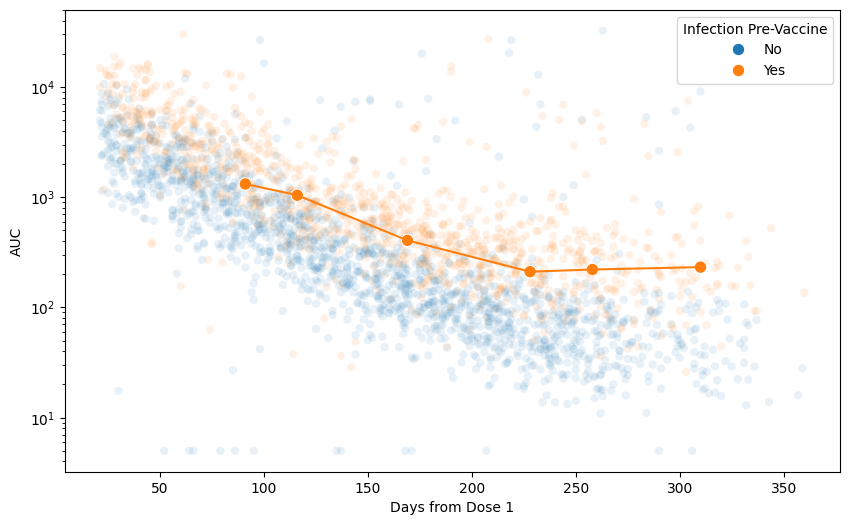

In [71]:
fig, ax = plt.subplots(figsize=(10, 6)) # Sets up a figure and axis for plotting
post_vax = data[data['Last Exposure'] == 'Dose 2'].copy()
poi = 'SPARTA-002'
just_one = post_vax[post_vax['Participant ID'] == poi].copy()
sns.scatterplot(data=post_vax, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine', alpha=0.1, legend=False)
sns.scatterplot(data=just_one, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine', hue_order=['No', 'Yes'],  alpha=1, s=80)
sns.lineplot(data=just_one, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine', hue_order=['No', 'Yes'],  alpha=1, legend=False)
plt.yscale('log')
ylim = plt.ylim() # Saves the current y-axis limits
plt.show()

In [ ]:
just_one['Log10AUC'] = np.log10(just_one['AUC']) # Adds a new column to the DataFrame with the log10 of the AUC values
stats.linregress(just_one['Days from Dose 1'], just_one['Log10AUC']) # Performs a linear regression on the data for the specified participant

LinregressResult(slope=np.float64(-0.0038763890246331584), intercept=np.float64(3.3870525335172603), rvalue=np.float64(-0.9218845055786242), pvalue=np.float64(0.008914714139525744), stderr=np.float64(0.0008146162695592445), intercept_stderr=np.float64(0.1711812281740788))

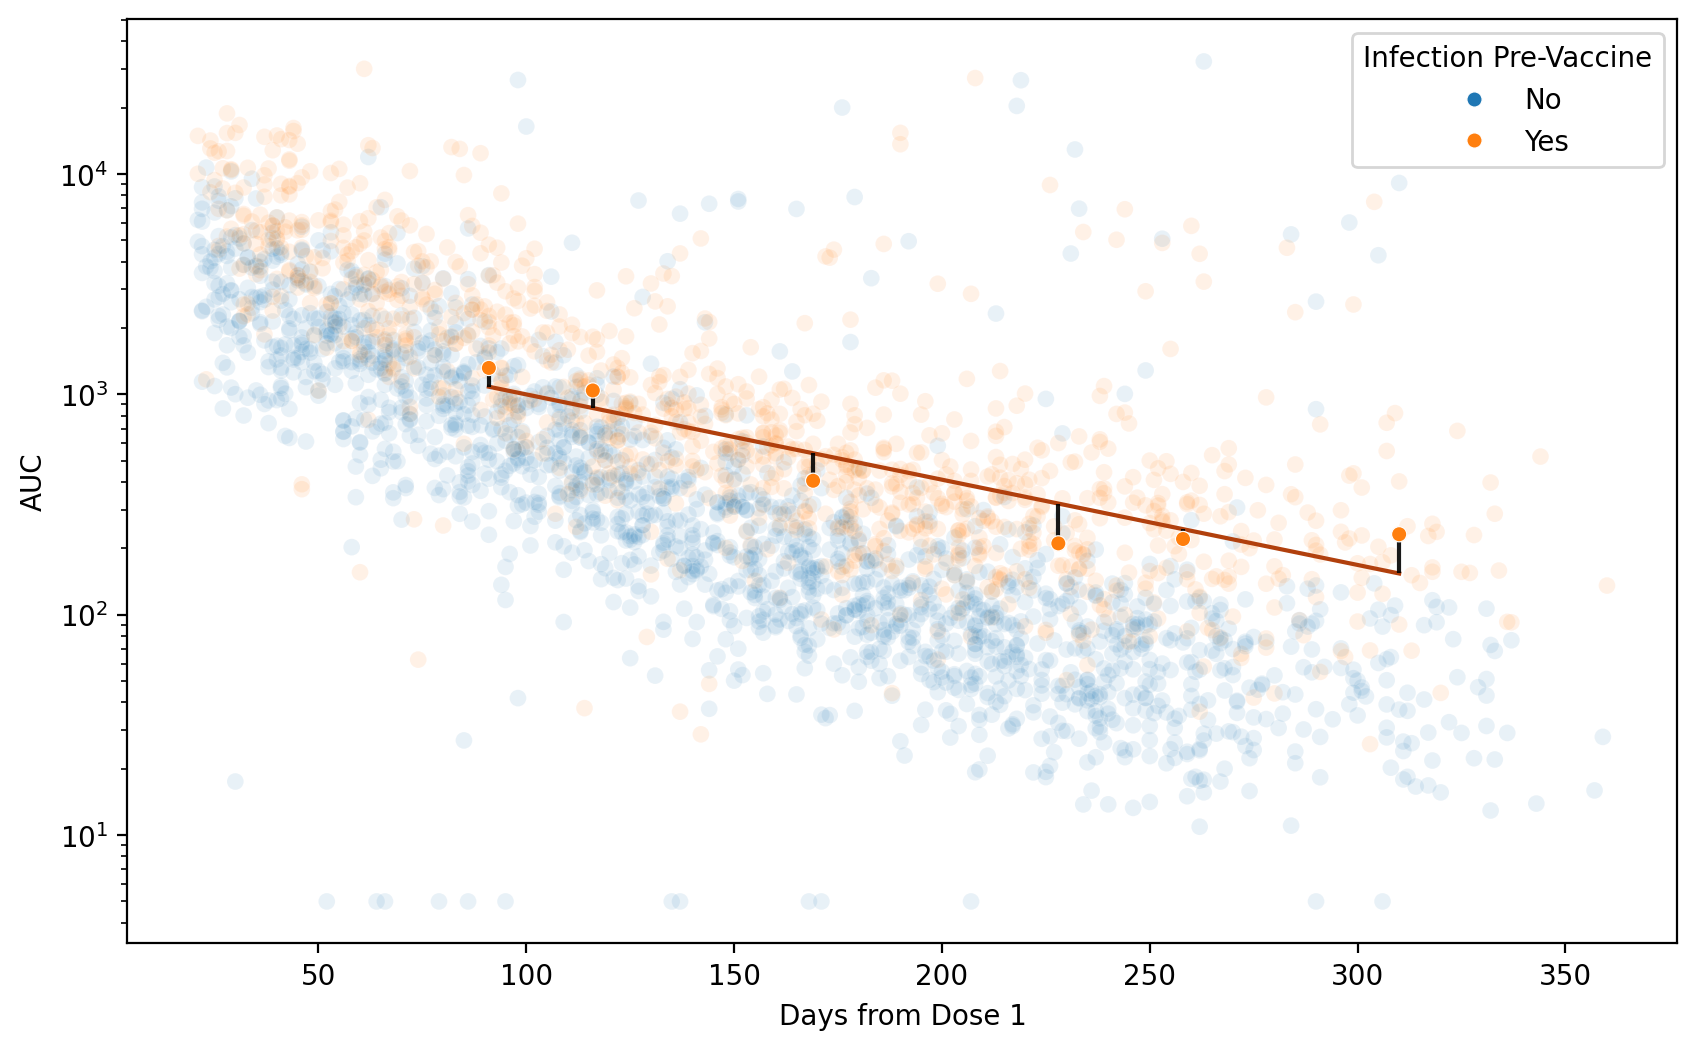

In [72]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200) # Sets up a figure and axis for plotting
post_vax = data[data['Last Exposure'] == 'Dose 2'].copy()
poi = 'SPARTA-002'
just_one = post_vax[post_vax['Participant ID'] == poi].copy()
x = just_one['Days from Dose 1'].to_numpy()
y = np.power(10, x * -0.00387 + 3.387)
plt.yscale('log')
sns.lineplot(x=x, y=y, color=sns.color_palette('dark')[1])
sns.scatterplot(data=just_one, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine', hue_order=['No', 'Yes'],  alpha=1, s=30, zorder=10)
sns.scatterplot(data=post_vax, x='Days from Dose 1', y='AUC', hue='Infection Pre-Vaccine', alpha=0.1, legend=None)
ax.vlines(x=x, ymin=y, ymax=just_one['AUC'], color='black', alpha=0.9, linestyle='-', zorder=5) # Adds vertical lines from the fitted line to the actual data points
plt.ylim(ylim)
plt.show()